<a href="https://www.kaggle.com/code/jothamaj/credit-card-fraud-detection-project?scriptVersionId=162774959" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


<span style="color: black; font-size: 30px;">         CREDIT CARD FRAUD DETECTION </span>

<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">INTRODUCTION</div>


- Credit card fraud is a type of violation committed using someone else's payment card, enabling the perpetrator to obtain goods/services and make payments to another account, thus violating the original owner's credit card information.

- The dataset includes various scaled features that are anonomised for privacy reasons.

- The aim of this project is to address the challenges posed by an imbalanced dataset in credit card fraud detection. Our goal is to create predictive models that can accurately distinguish between fraudulent and legitimate transactions based on key features. Techniques such as logistic regression and random tree classifiers will be employed for the purpose of determining the model with the highest accuracy.

- To tackle the imbalance in the data, we will leverage methods like SMOTE (Synthetic Minority Over-sampling Technique) and random oversampling. These approaches aim to generate synthetic instances or replicate minority class samples to create a more balanced training set for robust model training.

- Through achieving accurate credit card fraud detection, we hope to contribute to reducing financial losses, enhancing customer trust, and fortifying the overall security of digital transactions.

<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">EXPLORATORY DATA ANALYSIS</div>


- The first step of dealing with this problem is to understand and gain a basic idea of the data. 

- We may need to perform necessary tasks to clean the data

- Creating visuals will allow us to get a better understanding of what we are dealing with

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [3]:
#Load dataset
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
print("Credit Card Fraud detection data set has", df.isnull().values.sum(), "missing values")

Credit Card Fraud detection data set has 0 missing values


In [9]:
#Get instances of fraud and normal transactions
fraud = df[df['Class'] == 1]
no_fraud = df[df['Class'] == 0]
print("There are", len(fraud), "instances of fraud")
print("There are", len(no_fraud), "normal transactions")

There are 492 instances of fraud
There are 284315 normal transactions


In [10]:
print("Fraud shape:", fraud.shape, "Normal shape:", no_fraud.shape)

Fraud shape: (492, 31) Normal shape: (284315, 31)


In [11]:
#Get summary statistics for the amount paid
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
no_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
#Compare both transaction values
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


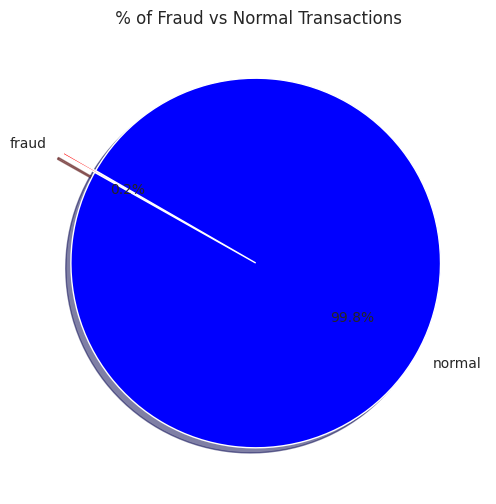

In [14]:
#Visualise important statistics - Fraud vs Normal
#Pie chart with % 

fraud_count = len(df[df['Class'] == 1])
no_fraud_count = len(df[df['Class'] == 0])

labels = ['fraud', 'normal']
sizes = [fraud_count, no_fraud_count]
colors = ['red','blue']
explode = [0.2,0]
sns.set_style("darkgrid")

plt.figure(figsize=(6,6))
plt.pie(sizes, labels = labels, explode = explode, colors= colors, autopct = '%1.1f%%', startangle = 150, shadow = True)
plt.title(' % of Fraud vs Normal Transactions')
plt.show()

#Pie chart shows that there are 0.2% cases of fraud which shows inbalance in the dataset.

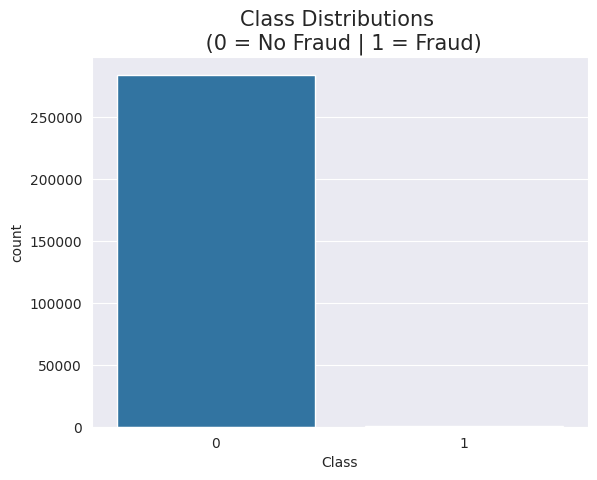

In [15]:
#Countplot visualisation

sns.countplot(x = 'Class', data=df)
plt.title('Class Distributions \n (0 = No Fraud | 1 = Fraud)', fontsize=15)

plt.show()

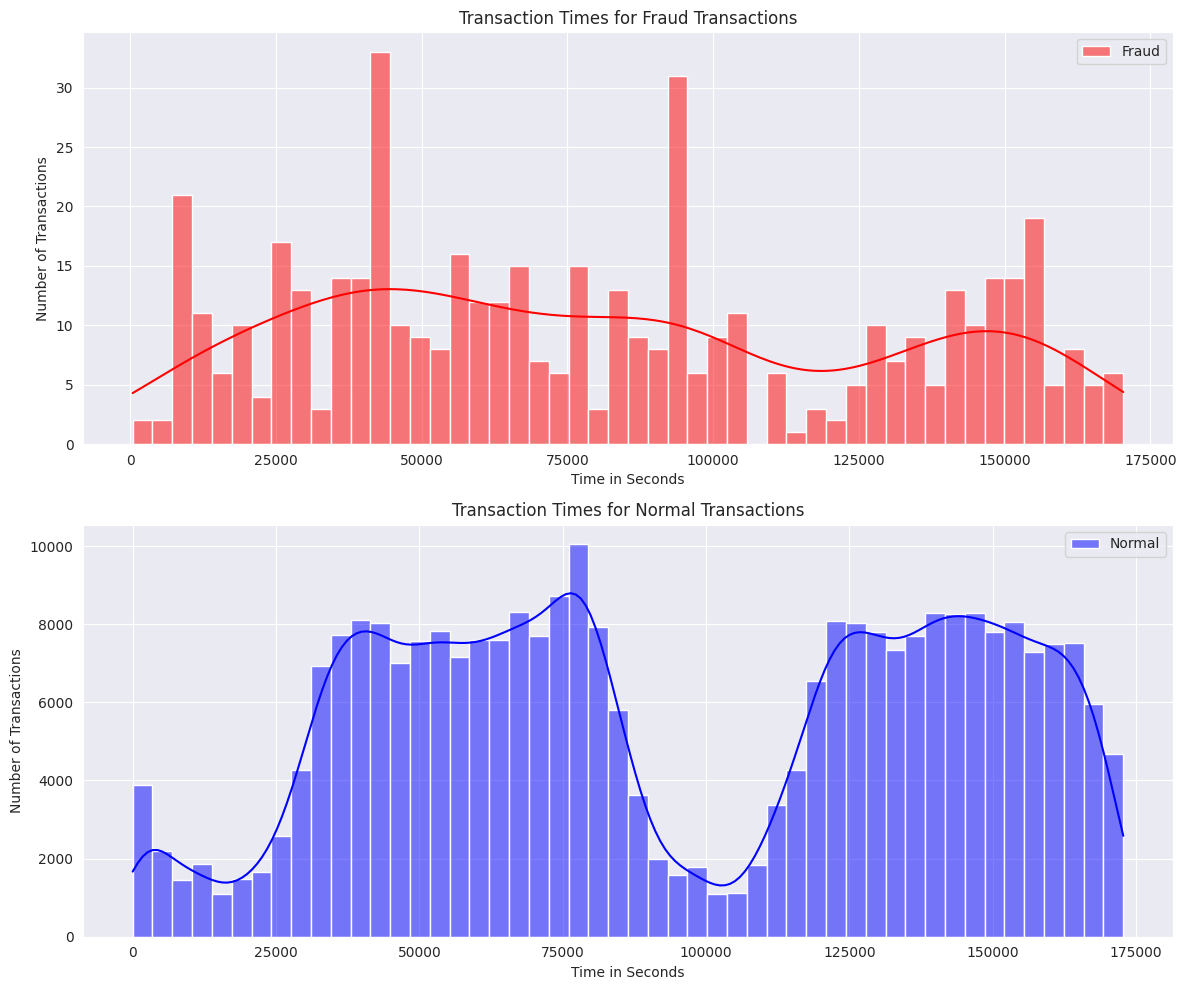

In [16]:
#subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

#fraud transactions
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Fraud', ax=ax1)
ax1.set_title('Transaction Times for Fraud Transactions')
ax1.set_xlabel('Time in Seconds')
ax1.set_ylabel('Number of Transactions')
ax1.legend()

#normal transactions
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Normal', ax=ax2)
ax2.set_title('Transaction Times for Normal Transactions')
ax2.set_xlabel('Time in Seconds')
ax2.set_ylabel('Number of Transactions')
ax2.legend()

plt.tight_layout()
plt.show()

<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">EDA SUMMARY</div>

- From the EDA we can conclude a few things:

- The data is highly imbalanced, 99.8% of transactions were normal and only 0.2% were considered fraudulent. This will have to be dealt with.

- Average transaction amount for fraud cases is £122.21 whilst non frau cases is lower at £88.29

- Time between fraudulent transactions is also smaller than normal transactions.


<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">FEATURE CORRELATION</div>

- Feature engineering will allow us to identify & isolate key variables/features in the dataset that may link closely to the target variable 

- We will begin by trying to find features with high correlation to the target variable

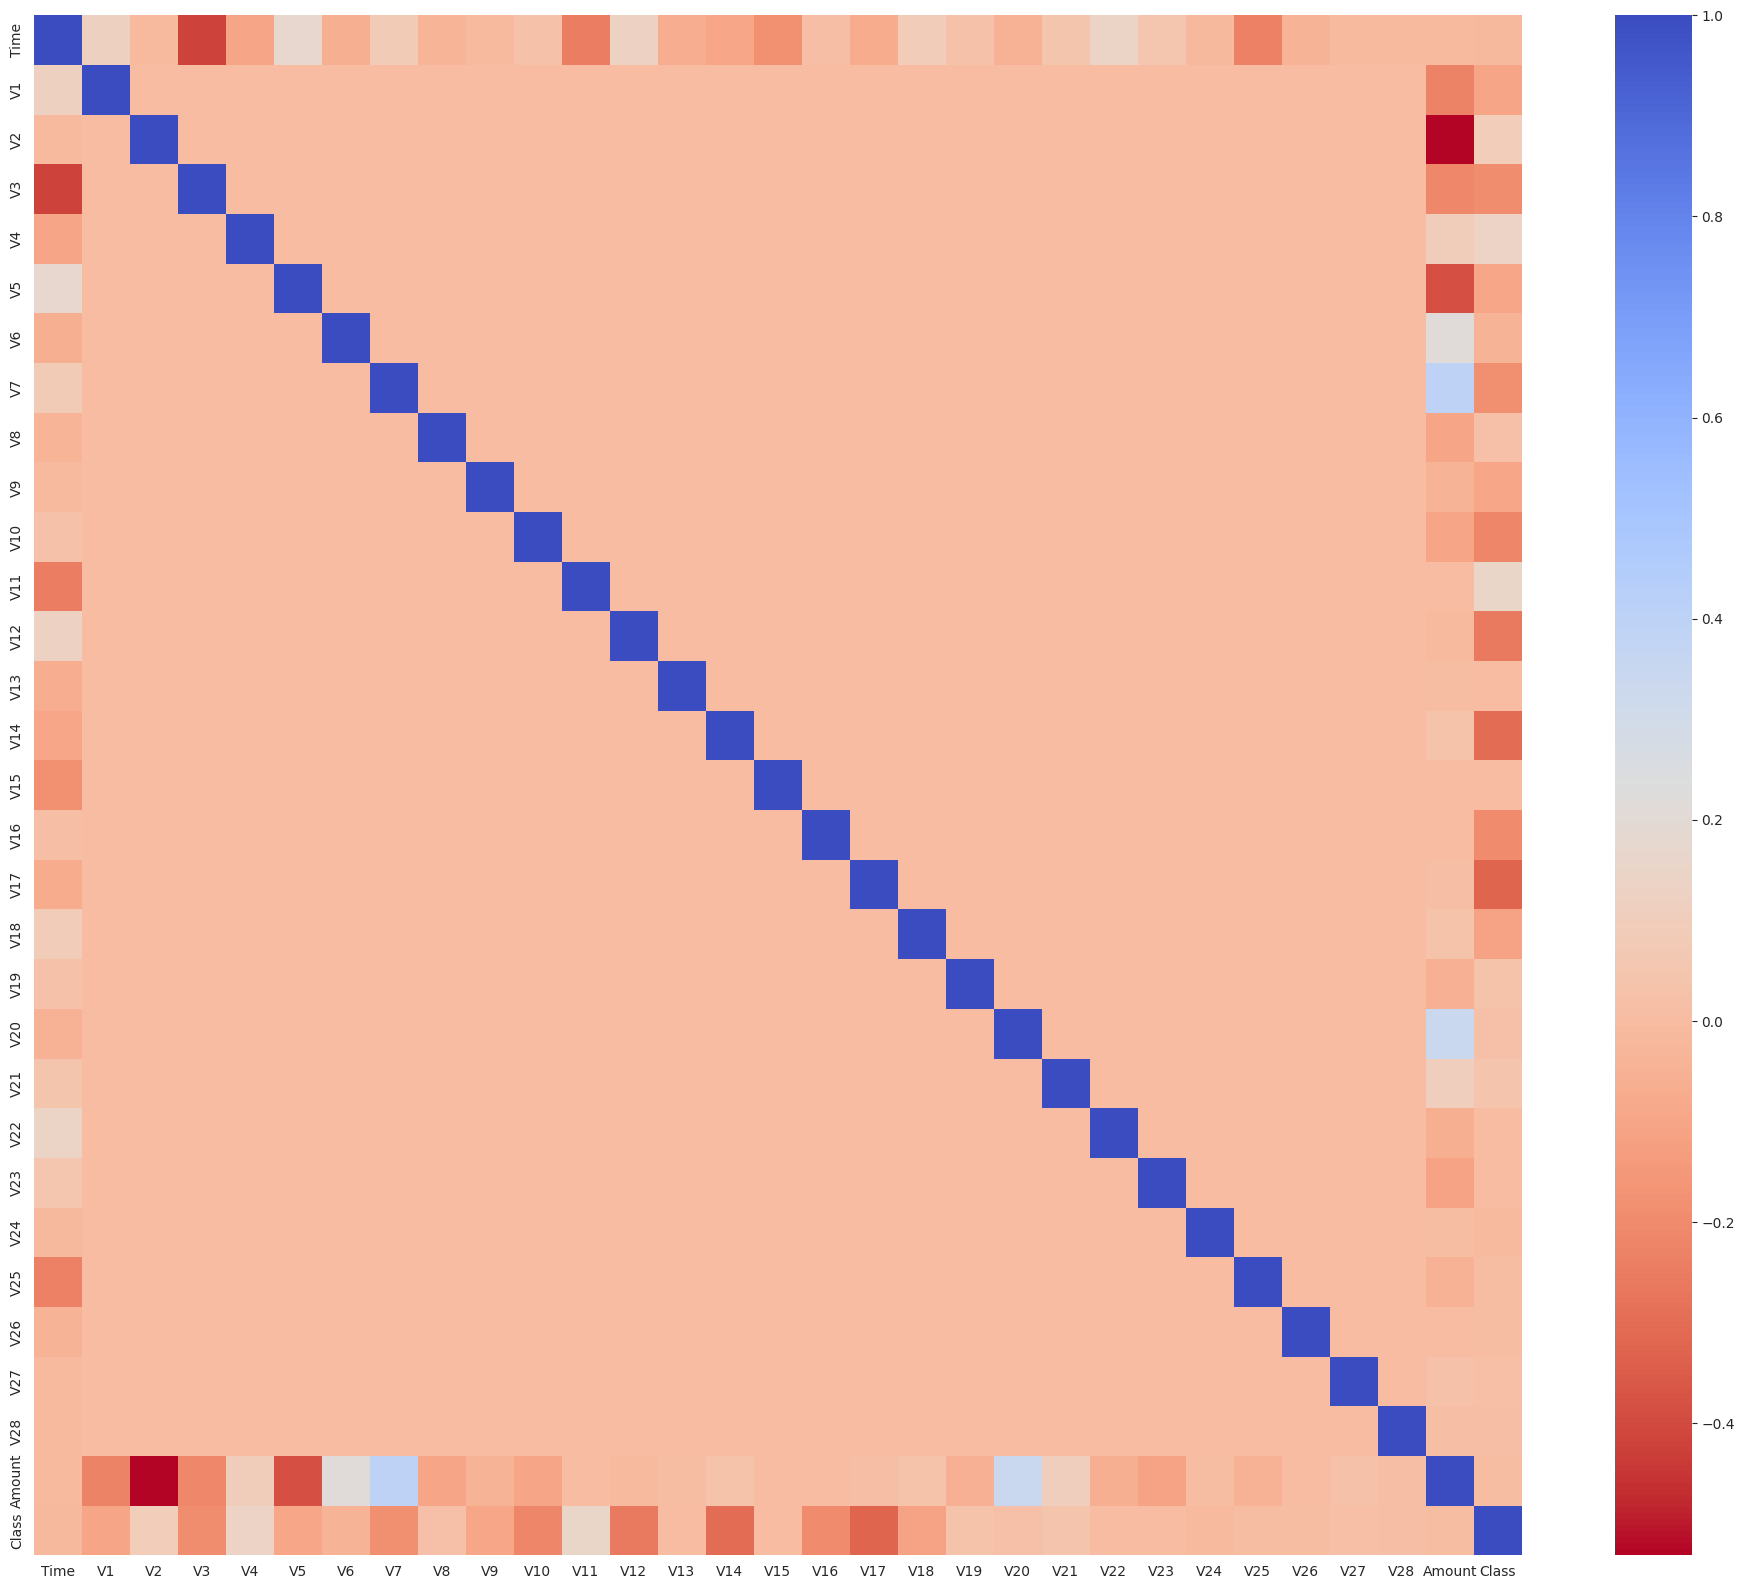

In [17]:
#Heap map 

plt.figure(figsize=(24,20))
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws={'size':20})
ax1.set_title("Correlation matrix for current data set", fontsize = 14)
plt.show()

Results: From plotting the correlation map with the features we do not find any notable correlations between features VI-V28. There seems to be a direct correlation with V7 & V20 on the amount.

<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">SPLIT DATA INTO TRAINING AND TESTING</div>

- Now the initial analysis is completed we can now split the data into testing and training sets.

- This will allow us to evaluate the performance of the machine learning models that we generate later on.

- The trainig set will be a subset of the original data whilst the test set will will be used to check the accuracy of our models.

- After being split we will then apply scaling to increase the algorithms effectiveness.

In [18]:
X = df.drop('Class', axis = 1)
y = df['Class'] #target variable we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Apply standard scalar
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (227845, 30)
y_train shape: (227845,)


In [19]:
print(f"Training dataset: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*58}")
print(f"Testing data set: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset: X_train: (227845, 30), y_train: (227845,)
__________________________________________________________
Testing data set: X_test: (56962, 30), y_test: (56962,)


In [20]:
# Get distributions - Calculate the percentage of each class in the training set
train_class_percentage = y_train.value_counts(normalize=True) * 100
print("Class distribution in Training Set:")
print(train_class_percentage)

test_class_percentage = y_test.value_counts(normalize=True) * 100
print("\nClass distribution in Testing Set:")
print(test_class_percentage)

Class distribution in Training Set:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Class distribution in Testing Set:
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">HANDLING IMBALANCE - OVERSAMPLING WITH SMOTE</div>

- As you we can see, this data set is highly imbalanced in favour of non fraudulent transactions. One way of dealing with this is by oversampling using SMOTE.

- SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic points close to other points, upsampling the minority class in order to reach an equal balance between the minority and majority class.

In [21]:
smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X,y)
#Class distribution
print("Class distribution in the SMOTE oversampled training set:")
print(pd.Series(y_resampled_smote).value_counts(normalize=True) * 100)

Class distribution in the SMOTE oversampled training set:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">HANDLING IMBALANCE - RANDOM UNDERSAMPLING</div>

- As well as oversampling, undersampling also addresses the issue of class imbalance by reducing the representation of the majority (non fraud) class in the data set.

- We will randomly remove classes from the majority class until there is balance.

- Following this, we will then be able to train the machine learning models on both of the data sets.

In [22]:
undersampler = RandomUnderSampler()
X_resampled_under, y_resampled_under = undersampler.fit_resample(X, y)
#Class distribution
print("Class distribution in the Random undersampled training set:")
print(pd.Series(y_resampled_under).value_counts(normalize=True) * 100)

Class distribution in the Random undersampled training set:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


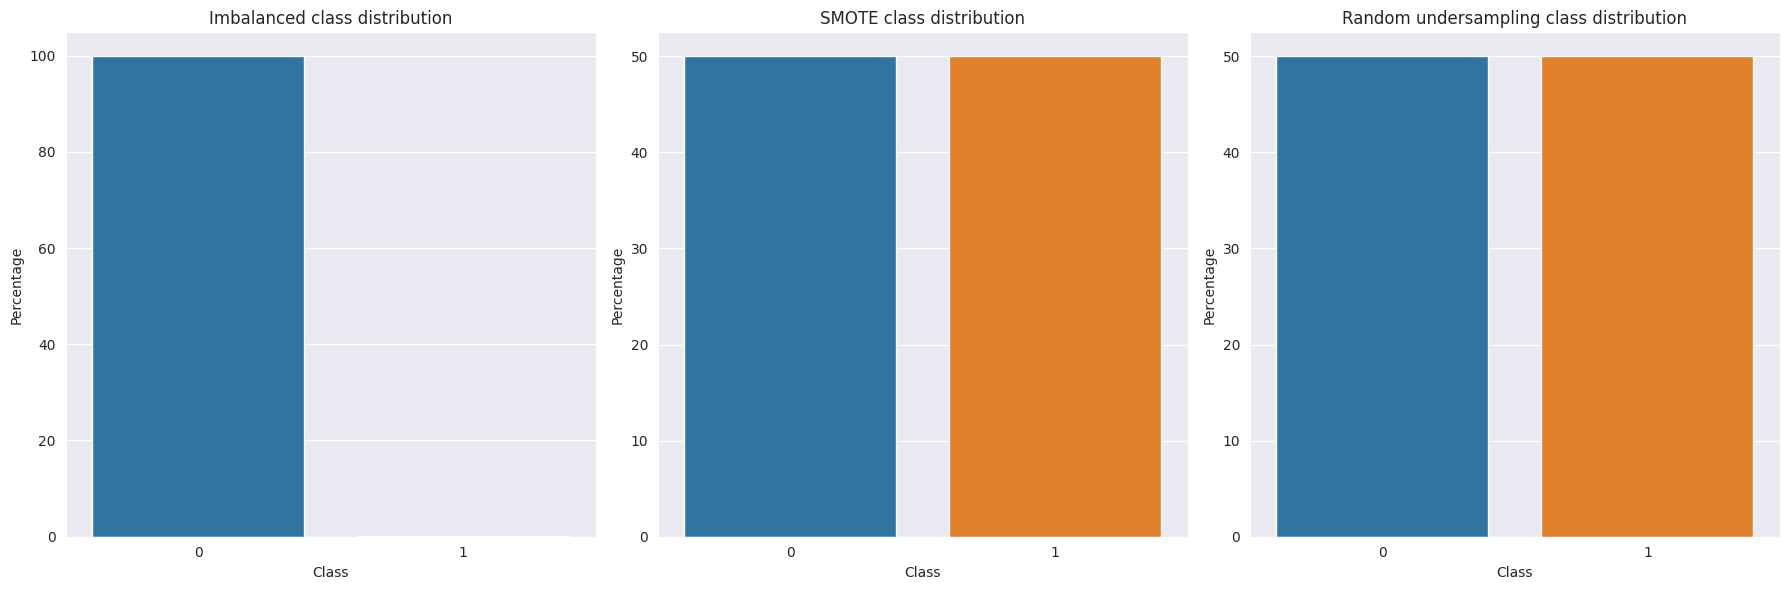

In [23]:
class_distr_before = pd.Series(y_train).value_counts(normalize=True) * 100
smote_class_distr = pd.Series(y_resampled_smote).value_counts(normalize=True) * 100
under_class_distr = pd.Series(y_resampled_under).value_counts(normalize=True) * 100

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=class_distr_before.index, y=class_distr_before.values)
plt.title('Imbalanced class distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

plt.subplot(1, 3, 2)
sns.barplot(x=smote_class_distr.index, y=smote_class_distr.values)
plt.title('SMOTE class distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')

plt.subplot(1, 3, 3)
sns.barplot(x=under_class_distr.index, y=under_class_distr.values)
plt.title('Random undersampling class distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')


plt.tight_layout()
plt.show()

<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">MODEL BUILDING AND TRAINING</div>

- Now that we have dealt with the imbalanced data we are able to build our model 

- As this is a classification problem we will be building a logistic regression model, a random forest model and also a neural network 

- We will compare the scores of each model across the undersampled and oversampled data to see which one provides us with the best accuracy

<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">1 LOGISTIC REGRESSION</div>

In [24]:
#Fit Both undersampled and oversampled data into logistic regression model and train it
LogReg_smote = LogisticRegression()
LogReg_under= LogisticRegression()

LogReg_smote.fit(X_resampled_smote, y_resampled_smote)
LogReg_under.fit(X_resampled_under, y_resampled_under)

#Test and predict
y_pred_smote = LogReg_smote.predict(X_resampled_smote)
y_pred_under = LogReg_under.predict(X_resampled_under)

roc_auc_smote = roc_auc_score(y_resampled_smote, y_pred_smote)
roc_auc_under = roc_auc_score(y_resampled_under, y_pred_under)


report_smote = classification_report(y_resampled_smote, y_pred_smote)
print("Classification Report for Logistic Regression Model (SMOTE):")
print(report_smote)
print("ROC AUC:", roc_auc_smote)

report_under = classification_report(y_resampled_under, y_pred_under)
print("\nClassification Report for Logistic Regression Model (Undersampling):")
print(report_under)
print("ROC AUC:", roc_auc_under)

Classification Report for Logistic Regression Model (SMOTE):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    284315
           1       0.98      0.96      0.97    284315

    accuracy                           0.97    568630
   macro avg       0.97      0.97      0.97    568630
weighted avg       0.97      0.97      0.97    568630

ROC AUC: 0.9718446089724425

Classification Report for Logistic Regression Model (Undersampling):
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       492
           1       0.95      0.89      0.92       492

    accuracy                           0.92       984
   macro avg       0.92      0.92      0.92       984
weighted avg       0.92      0.92      0.92       984

ROC AUC: 0.9217479674796748


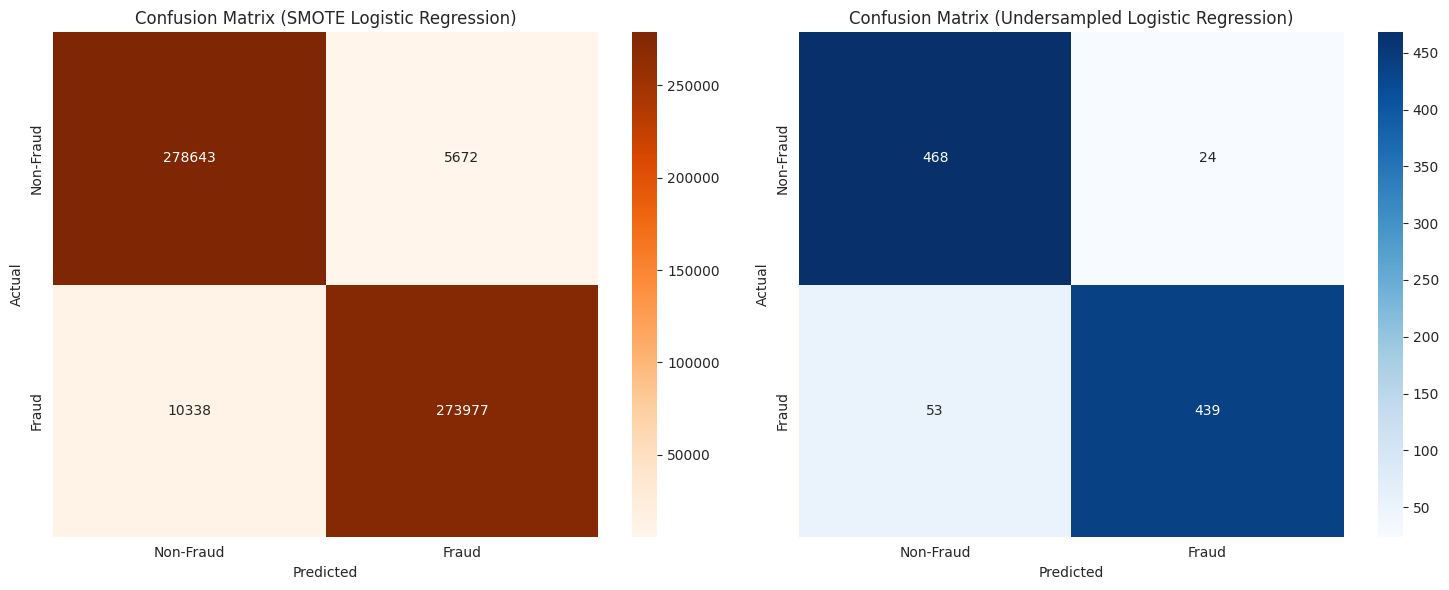

In [25]:
#Confusion matrix for both models
confusion_matrix_smote = confusion_matrix(y_resampled_smote, y_pred_smote)
confusion_matrix_under = confusion_matrix(y_resampled_under, y_pred_under)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#smote
sns.heatmap(confusion_matrix_smote, annot=True, fmt='d', cmap=plt.cm.Oranges, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[0])
axes[0].set_title('Confusion Matrix (SMOTE Logistic Regression)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

#undersampled
sns.heatmap(confusion_matrix_under, annot=True, fmt='d', cmap=plt.cm.Blues, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[1])
axes[1].set_title('Confusion Matrix (Undersampled Logistic Regression)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


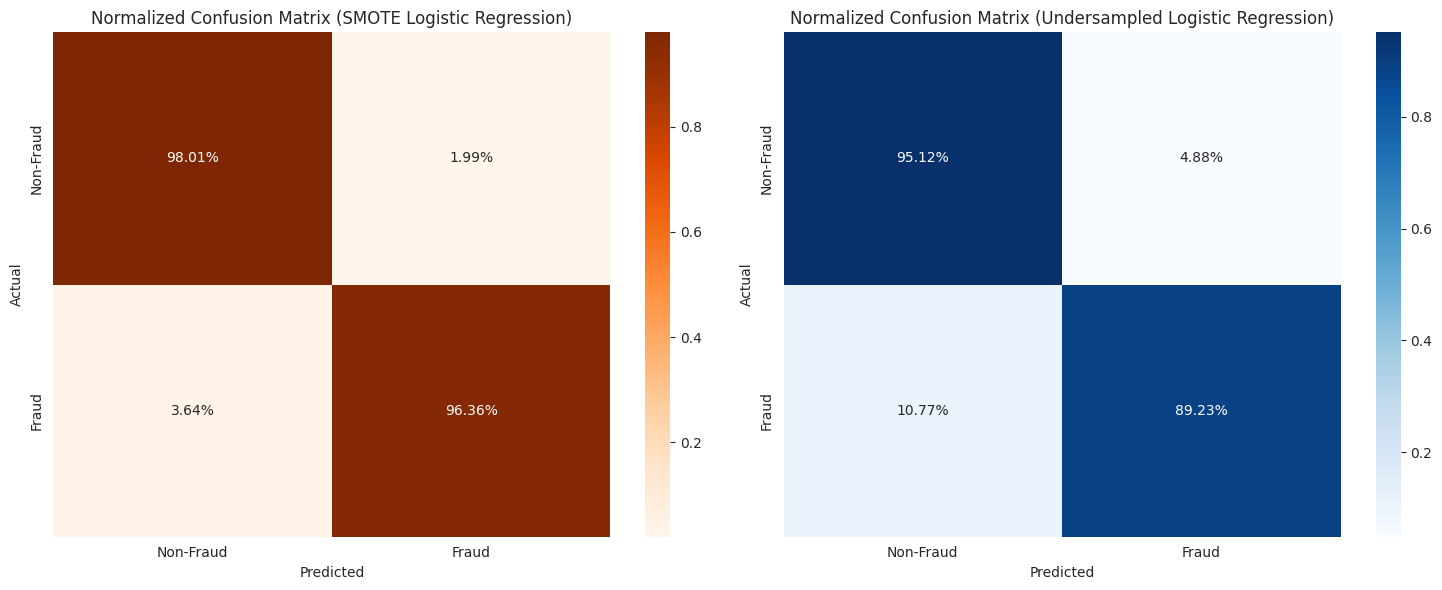

In [26]:
# Normalize the confusion matrices
normalized_confusion_matrix_smote = confusion_matrix_smote / confusion_matrix_smote.sum(axis=1, keepdims=True)
normalized_confusion_matrix_under = confusion_matrix_under / confusion_matrix_under.sum(axis=1, keepdims=True)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.heatmap(normalized_confusion_matrix_smote, annot=True, fmt='.2%', cmap=plt.cm.Oranges, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[0], cbar=True)
axes[0].set_title('Normalized Confusion Matrix (SMOTE Logistic Regression)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


sns.heatmap(normalized_confusion_matrix_under, annot=True, fmt='.2%', cmap=plt.cm.Blues, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[1], cbar=True)
axes[1].set_title('Normalized Confusion Matrix (Undersampled Logistic Regression)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">2 RANDOM FOREST CLASSIFIER</div>

In [27]:
# Fit Both undersampled and oversampled data into Random forest classifier model and train it
random_forest_smote = RandomForestClassifier(max_depth=4, random_state=0)
random_forest_under = RandomForestClassifier(max_depth=4, random_state=0)

random_forest_smote.fit(X_resampled_smote, y_resampled_smote)
random_forest_under.fit(X_resampled_under, y_resampled_under)

# Test and predict
y_pred_smote_rf = random_forest_smote.predict(X_resampled_smote)
y_pred_under_rf = random_forest_under.predict(X_resampled_under)

roc_auc_smote_rf = roc_auc_score(y_resampled_smote, y_pred_smote_rf)
roc_auc_under_rf = roc_auc_score(y_resampled_under, y_pred_under_rf)

report_smote_rf = classification_report(y_resampled_smote, y_pred_smote_rf)
print("Classification Report for Random Forest Classifier Model (SMOTE):")
print(report_smote_rf)
print("ROC AUC (SMOTE):", roc_auc_smote_rf)

report_under_rf = classification_report(y_resampled_under, y_pred_under_rf)
print("\nClassification Report for Random Forest Classifier Model (Undersampling):")
print(report_under_rf)
print("ROC AUC (Undersampling):", roc_auc_under_rf)


Classification Report for Random Forest Classifier Model (SMOTE):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    284315
           1       0.99      0.94      0.96    284315

    accuracy                           0.96    568630
   macro avg       0.97      0.96      0.96    568630
weighted avg       0.97      0.96      0.96    568630

ROC AUC (SMOTE): 0.9646553998206214

Classification Report for Random Forest Classifier Model (Undersampling):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       492
           1       1.00      0.89      0.94       492

    accuracy                           0.95       984
   macro avg       0.95      0.95      0.95       984
weighted avg       0.95      0.95      0.95       984

ROC AUC (Undersampling): 0.9461382113821137


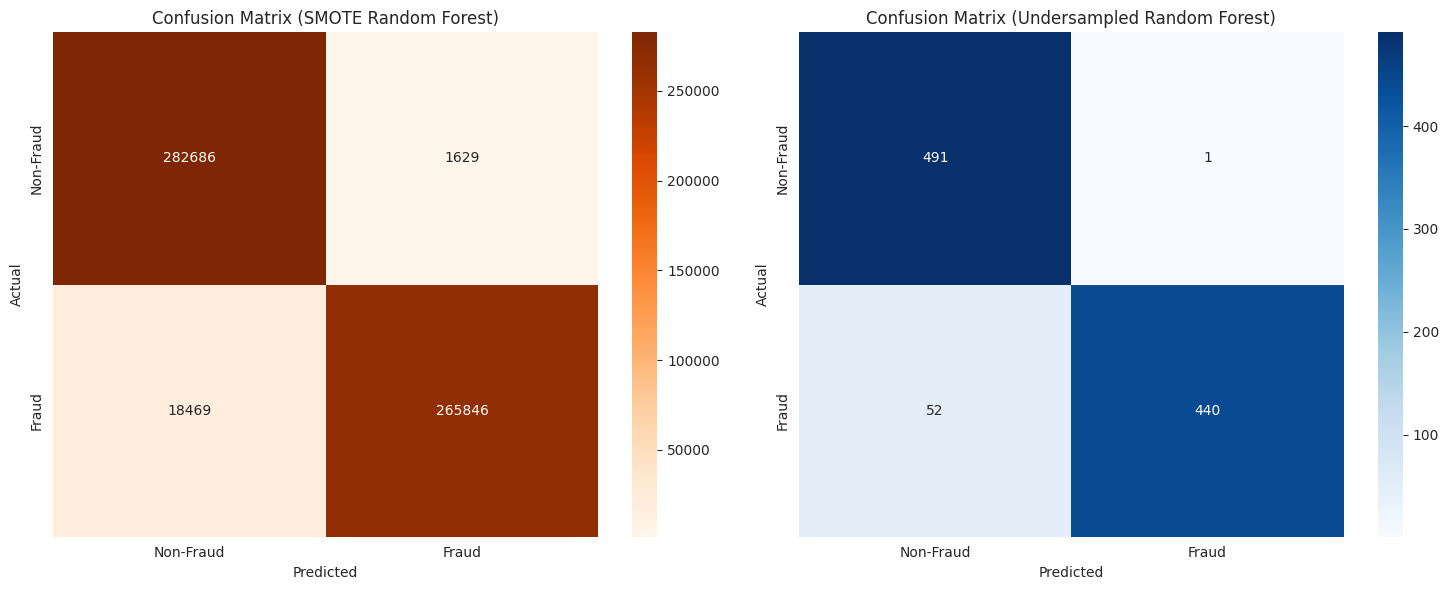

In [28]:
#Confusion matrix for both models
confusion_matrix_smote_rf = confusion_matrix(y_resampled_smote, y_pred_smote_rf)
confusion_matrix_under_rf = confusion_matrix(y_resampled_under, y_pred_under_rf)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#smote
sns.heatmap(confusion_matrix_smote_rf, annot=True, fmt='d', cmap=plt.cm.Oranges, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[0])
axes[0].set_title('Confusion Matrix (SMOTE Random Forest)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

#undersampled
sns.heatmap(confusion_matrix_under_rf, annot=True, fmt='d', cmap=plt.cm.Blues, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[1])
axes[1].set_title('Confusion Matrix (Undersampled Random Forest)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

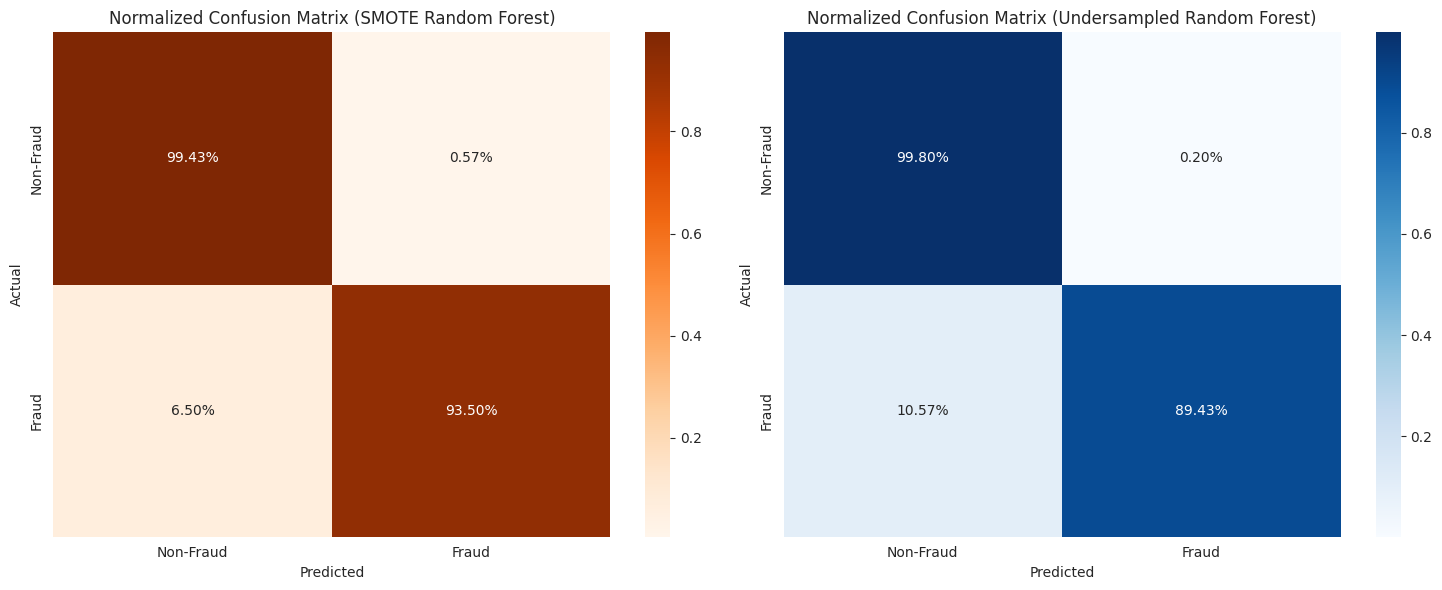

In [29]:
# Normalize the confusion matrices
normalized_confusion_matrix_smote_rf = confusion_matrix_smote_rf / confusion_matrix_smote_rf.sum(axis=1, keepdims=True)
normalized_confusion_matrix_under_rf = confusion_matrix_under_rf / confusion_matrix_under_rf.sum(axis=1, keepdims=True)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.heatmap(normalized_confusion_matrix_smote_rf, annot=True, fmt='.2%', cmap=plt.cm.Oranges, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[0], cbar=True)
axes[0].set_title('Normalized Confusion Matrix (SMOTE Random Forest)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')


sns.heatmap(normalized_confusion_matrix_under_rf, annot=True, fmt='.2%', cmap=plt.cm.Blues, 
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=axes[1], cbar=True)
axes[1].set_title('Normalized Confusion Matrix (Undersampled Random Forest)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


<div style="background-color: #f5f5dc; padding: 10px; color: #f5f5dc; font-size: 16px; font-weight: bold;">CONCLUSION</div>

- From the results we can see that the Random Forest Classifier trained both models with higher percision, recall, F1 score, accuracy and also ROC AUC

- Logistc regression model showed lower levels of performance

- The issue of data imbalance was also handled effectively